# ADVANCED

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Loadin data
df = pd.read_csv('./data/data_jobs.csv')

In [ ]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [ ]:
type(df['job_posted_date'])

In [ ]:
df.head()

In [ ]:
df.loc[:, 'salary_rate':'salary_hour_avg'].dropna(subset='salary_rate')

## Data Cleaning

In [ ]:
median_salary_year = df.salary_year_avg.median()

In [ ]:
median_salary_hour = df.salary_hour_avg.median()

In [ ]:
df_filled = df
df_filled['salary_year_avg'] = df_filled['salary_year_avg'].fillna(value=median_salary_year)
df_filled['salary_hour_avg'] = df_filled['salary_hour_avg'].fillna(value=median_salary_hour)

In [ ]:
df_filled.loc[:10, 'salary_year_avg' : 'salary_hour_avg']

In [ ]:
df_uinque = df_filled
df_uinque = df_uinque.drop_duplicates()
print('Length of original df:           ', len(df_filled))
print('Length of drop duplicates df:    ', len(df_uinque))
print('Rows Dropped:                    ', len(df_filled) - len(df_uinque))

In [ ]:
df_uinque = df_uinque.drop_duplicates(subset=['job_title', 'company_name'])
print('Length of original df:           ', len(df_filled))
print('Length of drop duplicates df:    ', len(df_uinque))
print('Rows Dropped:                    ', len(df_filled) - len(df_uinque))

## Data Management
### df.sample(), df.copy()

In [ ]:
# метод возвращает подмножество случайных элементов из этого ряда
# при параметре random_state - случайные элементы всегда будут одни и теже
df.sample(10, random_state=42)

In [ ]:
df_original = pd.read_csv('./data/data_jobs.csv')

### При первом выражении ниже, создастся датафрейм с таким же id как и у  оригинального, поэтому необходимо использовать метод COPY
- df_altered = df_original  
- print(id(df_original))
- print(id(df_altered))
    - 128677527495280
    - 128677527495280

- id(df_original) == id(df_altered)
    - True

### Использование метода COPY

In [ ]:
df_altered = df_original.copy()

In [ ]:
print('ID of df_original:                   ', id(df_original))
print('ID of df_altered:                    ', id(df_altered))
print('Are the two dataframes the same?     ', id(df_original) == id(df_altered))

### Pivot Tables
- df.pivot_table()

In [ ]:
df_pivot = pd.read_csv('./data/data_jobs.csv')

In [ ]:
df_pivot.pivot_table(index='job_title_short', aggfunc='size')

In [ ]:
df_pivot.groupby('job_title_short').size()

In [ ]:
df_pivot.pivot_table(values='salary_year_avg', index='job_title_short', aggfunc='median')

In [ ]:
df_pivot.groupby('job_title_short')['salary_year_avg'].median()

In [ ]:
df_pivot.pivot_table(values='salary_year_avg', index='job_country', columns='job_title_short', aggfunc='median')

In [ ]:
# Получаем массив (лист)
top_countries = df_pivot['job_country'].value_counts().head(6).index
top_countries

In [ ]:
df_job_country_salary = df_pivot.pivot_table(values='salary_year_avg',
                     index='job_country',
                     columns='job_title_short',
                     aggfunc='median')

df_job_country_salary = df_job_country_salary.loc[top_countries]

job_title = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# Можно и такой вариант
# df_job_country_salary.loc[top_countries, job_title]

df_job_country_salary = df_job_country_salary[job_title]
df_job_country_salary

In [ ]:
df_job_country_salary.plot(kind='bar')
plt.ylabel('Median salary ($USD)')
plt.xlabel('')
plt.title('Median salary by Country and Job Title')
plt.xticks(rotation=45, ha='right')
plt.show()

## Index Management
- df.sort_index()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Loadin data
df_index = pd.read_csv('./data/data_jobs.csv')

In [ ]:
df.index

In [ ]:
df.index.name = 'job_index'

In [ ]:
df.head()

In [ ]:
df.index.dtype

## Three Methods to cover
- df.reset_index()
- df.set_index()
- df.sort_index()

### reset_index()

In [ ]:
df_usa = df[df['job_country'] == 'United States']

In [ ]:
df_usa.head(4)

In [ ]:
df_usa.reset_index(inplace=True)
df_usa.head(5)

### set_index()

In [ ]:
df_usa.set_index('job_index', inplace=True)
df_usa.head(5)

### sort_index()

In [ ]:
median_pivot = df_usa.pivot_table(values='salary_year_avg',
                                  index='job_title_short',
                                  aggfunc=['median', 'min', 'max'])

In [ ]:
median_pivot.sort_values(by=('median', 'salary_year_avg'), ascending=False)

## Analyzing Data Science Job Demand

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Loadin data
df = pd.read_csv('./data/data_jobs.csv')

In [ ]:
df.head(2)

In [ ]:
df_US = df[df['job_country'] == 'United States']
df_US.head(2)

In [ ]:
df_US['job_posted_date'] = pd.to_datetime(df_US['job_posted_date'])

In [ ]:
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')

In [ ]:
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_US_pivot.iloc[0:3, 0:4]

In [ ]:
df_US_pivot.reset_index(inplace=True)
df_US_pivot

In [ ]:
df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot

In [ ]:
df_US_pivot.sort_values('month_no', inplace=True)
df_US_pivot

In [ ]:
df_US_pivot.set_index('job_posted_month', inplace=True)
df_US_pivot

In [ ]:
df_US_pivot.drop(columns='month_no', inplace=True)
df_US_pivot

In [ ]:
df_US_pivot.to_csv(path_or_buf='./data/job_posted_da.csv')

In [ ]:
df_US_pivot.plot(kind='line')

In [ ]:
top_3 = df_US['job_title_short'].value_counts().head(3)
# top_3 = top_3 результат = index. Index(['Data Analyst', 'Data Scientist', 'Data Engineer'], dtype='object', name='job_title_short')
# ['Data Analyst', 'Data Scientist', 'Data Engineer']
top_3 = top_3.index.tolist()

In [ ]:
df_US_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.xlabel('2023')
plt.ylabel('job Count')
plt.legend()
plt.show()

## Merge DataFrames
- pd.megre(df1, df2, on='index')

In [ ]:
df_jobs = pd.DataFrame({'job_id' : [1, 2, 3, 4, 5],
                        'job_title': ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager'],
                        'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'SpaceX'],
                        'job_location': ['Mountain View, CA', 'Redmond, WA', 'Cupertino, CA', 'Beaverton, OR', 'Brownsville, TX']})

In [ ]:
df_jobs

In [ ]:
df_companies = pd.DataFrame({'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'SpaceX'],
                             'industry' : ['Technology', 'Technology', 'Technology', 'Apparel', 'Technology'],
                             'company_size': ['100,000+', '100,000+', '100,000+', '75,000+', '13,000+']})

In [ ]:
df_companies

In [ ]:
df_jobs.merge(right=df_companies, on='company_name')

In [ ]:
'''Создать DataFrame для 4 профессий и 12 месяцев'''
import pandas as pd
import numpy as np

# Define months and job titles
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
job_titles = ["Front-End Developer", "Back-End Developer", "Full-Stack Developer", "UI/UX Designer"]

# Generate random job posting values between 50 and 500 for each role per month
data = {job_title: np.random.randint(1000, 20500, size=len(months)) for job_title in job_titles}

# Create DataFrame and assign job titles to index
df = pd.DataFrame(data, index=months)
df.index.name = 'job_posted_month'

# Save to CSV
df.to_csv('./data/job_posted_dev.csv')

print("CSV file 'job_postings.csv' created successfully.")


In [ ]:
jobs_da = pd.read_csv('./data/job_posted_ds.csv', index_col='job_posted_month')
jobs_da

In [ ]:
jobs_dev = pd.read_csv('./data/software_jobs_luke.csv', index_col='job_posted_month')
jobs_dev

In [ ]:
df_US_merged = jobs_da.merge(right=jobs_dev, on='job_posted_month')

In [ ]:
df_US_merged

In [ ]:
# Add the "job_title_short" row label as in the first table
# Convert columns to a MultiIndex, with "job_title_short" as the top level
# df_US_merged.columns = pd.MultiIndex.from_product([['job_title_short'], df_US_merged.columns])

In [ ]:
# Помещая в скобки можно переносить методы и функции на следующую строку.
top_5 = (df_US_merged
         .sum()
         .sort_values(ascending=False)
         .head()
         .index # Get the index of the top 5
         .to_list()
         )
top_5

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_US_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postings for Top Tech Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0, 20000)
plt.legend()
plt.show()

## Merge DataFrames
- pd.concat([df1, df2])

In [ ]:
job_postings_jan = pd.DataFrame({'job_id' : [1, 2, 3, 4, 5],
                        'job_title': ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Scientist', 'Data Engineer'],
                        'company_name': ['Company A', 'Company B', 'Company C', 'Company D', 'Company E'],
                        'job_posted_date': ['2024-01-02', '2024-01-07', '2024-01-14', '2024-01-19', '2024-01-24']})

In [ ]:
job_postings_jan

In [ ]:
job_postings_feb = pd.DataFrame({'job_id' : [1, 2, 3, 4, 5],
                        'job_title': ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Scientist', 'Data Engineer'],
                        'company_name': ['Company F', 'Company G', 'Company H', 'Company I', 'Company J'],
                        'job_posted_date': ['2024-02-05', '2024-02-09', '2024-02-12', '2024-02-18', '2024-02-22']})

In [ ]:
job_postings_feb

In [ ]:
# For example if we merge instead of concat 
job_postings_jan.merge(right=job_postings_feb, on='job_title', suffixes=('_jan', '_feb'))

In [ ]:
pd.concat([job_postings_jan, job_postings_feb], ignore_index=True)

In [ ]:
df = pd.read_csv('./data/data_jobs.csv')

In [ ]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [ ]:
df.head(3)

In [ ]:
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%b')

In [ ]:
df.head(3)

In [ ]:
# dict_month = {
#     'Jan' : df_jan,
#     'Dec' : df_feb,
#     'Mar' : df_mar,
#     'Jan' : df_apr,
#     'Apr' : df_may,
#     'May' : df_jun,
#     'Jun' : df_jul,
#     'Jul' : df_sep,
#     'Aug' : df_aug,
#     'Sep' : df_sep,
#     'Oct' : df_oct,
#     'Nov' : df_nov,
#     'Dec' : df_dec,
# }

months = df['job_posted_month'].unique()
months

In [ ]:
dict_months = {month: df[df['job_posted_month'] == month] for month in months}

In [ ]:
dict_months['Jan']

## Needs 2023 Quarter 1

In [ ]:
df_q1 = pd.concat([dict_months['Jan'], dict_months['Feb'], dict_months['Mar']], ignore_index=True)

In [ ]:
df_q1['job_posted_month'].value_counts().plot(kind='bar')

In [ ]:
df_q1

## Pandas: Exporting DataFrames
- df.to_excel(), df.to_csv()

In [ ]:
df_q1.head().to_clipboard(sep=',')

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,,,,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 'tableau']","{'analyst_tools': ['power bi', 'tableau'], 'programming': ['r', 'python', 'sql', 'nosql']}",Jan
1,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,,,,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'scikit-learn', 'matplotlib', 'hadoop', 'spark']","{'libraries': ['pandas', 'numpy', 'scikit-learn', 'matplotlib', 'hadoop', 'spark'], 'programming': ['r', 'python', 'sql']}",Jan
2,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,,,,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
3,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,,,,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws'], 'programming': ['sql', 'python']}",Jan
4,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,,,,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python', 'sql']}",Jan


In [ ]:
df_q1.to_csv(path_or_buf='quarter_1.csv')

In [ ]:
df_test = pd.read_csv('quarter_1.csv', index_col=0)

In [ ]:
df_q1.to_excel(excel_writer='quarter_1.xlsx')

## Pandas: Applying Functions
- df.apply(lambda x: x * 2)

### apply() - Calculate Project Salary Next Year

In [ ]:
df_applying = pd.read_csv('./data/data_jobs.csv')

In [ ]:
df_applying['job_posted_date'] = pd.to_datetime(df_applying['job_posted_date'])

In [ ]:
df_applying[pd.notna(df_applying['salary_year_avg'])]['salary_year_avg']

In [ ]:
help(df.apply)

In [ ]:
df_salary = df_applying[pd.notna(df_applying['salary_year_avg'])].copy()

In [ ]:
df_salary.head(3)

In [ ]:
def projected_salary(salary):
    return salary * 1.03

df_salary['salary_year_inflated'] = df_salary['salary_year_avg'].apply(projected_salary)

In [ ]:
df_salary[['salary_year_avg', 'salary_year_inflated']]

In [ ]:
df_salary['salary_year_inflated'] = df_salary['salary_year_avg'].apply(lambda salary: salary * 1.03)

In [ ]:
df_salary[['salary_year_avg', 'salary_year_inflated']]

In [ ]:
df_salary['salary_year_inflated'] = df_salary['salary_year_avg'] * 1.03

In [ ]:
df_salary[['salary_year_avg', 'salary_year_inflated']]

In [ ]:
type(df_applying['job_skills'][3])

In [ ]:
# Convert to list
import ast

type(ast.literal_eval(df_applying['job_skills'][3]))

In [ ]:
def clean_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
    
df_applying['job_skills'] = df_applying['job_skills'].apply(clean_list)

In [ ]:
type(df_applying['job_skills'][3])

In [ ]:
df_applying['job_skills'] = df_applying['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

## Calculate projected salary next year
- Senior roles assume 5%
- Other rolse assume 3%

In [ ]:
def projected_salary(row):
    if 'Senior' in row['job_title_short']:
        return row['salary_year_avg'] * 1.05
    else:
        return row['salary_year_avg'] * 1.03

df_salary['salary_year_inflated'] = df_salary.apply(projected_salary, axis=1)

df_salary[['job_title_short', 'salary_year_avg', 'salary_year_inflated']]

## Pandas: Explode
### df.explode('job_skills')

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [ ]:
data = {
    'job_title_short' : ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills' : [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skill_lists = pd.DataFrame(data=data)
df_skill_lists

In [ ]:
df_skill_lists.explode('job_skills').value_counts('job_skills').plot(kind='bar')

In [ ]:
# Loadin data
df_explode = pd.read_csv('./data/data_jobs.csv')

In [ ]:
type(df_explode['job_skills'][3])

In [ ]:
# Data Cleanup
df_explode['job_posted_date'] = pd.to_datetime(df_explode['job_posted_date'])
# literal_eval - convert to type list
df_explode['job_skills'] = df_explode['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_explode.head(3)

In [ ]:
type(df_explode['job_skills'][3])

In [ ]:
help(df.explode)

In [ ]:
df_explode_exploded = df_explode.explode('job_skills')

In [ ]:
df_explode_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [ ]:
skills_count = df_explode_exploded.groupby(['job_title_short', 'job_skills']).size()
skills_count

In [ ]:
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count

In [ ]:
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

In [ ]:
job_title = 'Data Scientist'
top_skills = 10

df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
df_skills_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()

plt.title(f'Top {top_skills} Skills for {job_title}s')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(b=False)
plt.show()

## Exercise: Trending Skills

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./data/data_jobs.csv')

In [ ]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [ ]:
df_DA.shape

In [ ]:
df_DA['job_posted_month_no'] = df['job_posted_date'].dt.month
df_DA_explode = df_DA.explode(column='job_skills')
df_DA_explode.head()


In [ ]:
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

In [ ]:
df_DA_pivot

In [ ]:
df_DA_pivot.shape

In [ ]:
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot.loc['Total'].sort_values(ascending=False)

In [ ]:
df_DA_pivot.loc['Total'].sort_values(ascending=False).index

In [ ]:
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

In [ ]:
df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot

In [ ]:
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 skills for Data analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [ ]:
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 skills for Data analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

## Matplotlib: Format Charts
### fig, ax = plt.sublots()

In [ ]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./data/data_jobs.csv')

In [ ]:
df ['job_posteddate'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
fig, ax = plt.subplots()
# df['job_title_short'].value_counts().plot(kind='bar', ax=ax)

In [ ]:
df['job_schedule_type'].value_counts().head(3)

In [ ]:
# fig, ax = plt.subplots(1, 2)
# df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
# df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])

# fig.tight_layout(pad=13)

In [ ]:
fig, ax = plt.subplots(1, 2)
ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))

fig.tight_layout(pad=13)

### Example - Counts of Top Skills in Job Postings

In [ ]:
df_skills = df.copy()
df_skills = df_skills.explode(column='job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

In [ ]:
df_skills_count

In [ ]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

## Matplotlib: Pie Plots
### plt.pie()

In [11]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv('./data/data_jobs.csv')

In [107]:
%%time

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df .head(5)

In [ ]:
df['job_work_from_home'].value_counts().plot(kind='pie')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

In [ ]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.title('Job Title')
plt.ylabel('')
plt.show()

In [ ]:
df['job_title_short'].value_counts().plot(kind='barh')
plt.title('Job Title')
plt.ylabel('')
plt.gca().invert_yaxis()

plt.show()

In [ ]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.2f%%')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

In [ ]:
df[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]

In [ ]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home' : 'Workfrom Home',
    'job_no_degree_mention' : 'Job degree Req.',
    'job_health_insurance' : 'Healt Insurance Offered'
}


# ax.pie(df['job_work_from_home'].value_counts())
for i, (column, title) in enumerate(dict_column.items()):
    
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.2f%%', labels=['False', 'True'])
    ax[i].set_title(title)


plt.show()

## Matplotlib: Scatter Plots
### df.plot(kind='scatter)

In [ ]:
# Sample data
data = {
    'job_skills': ['Python', 'SQL', 'Machine Learning', 'Data Visualization'],
    'skill_count': [120, 90, 75, 60],
    'skill_pay': [95000, 85000, 105000, 80000]
}

df_test_scatter = pd.DataFrame(data)

df

In [ ]:
df_test_scatter.plot(kind='scatter', x='skill_count', y='skill_pay')

In [14]:
df = df[df['job_title_short'] == 'Data Analyst']

In [15]:
df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,NaN,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,NaN,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."


In [16]:
df_exploded = df.explode('job_skills')

In [17]:
df_exploded.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."


In [37]:
df_exploded.groupby('job_skills').size()

job_skills
airflow       2002
airtable        88
alteryx       4570
angular        376
angular.js       2
              ... 
wrike           39
wsl             16
xamarin          2
yarn            76
zoom           465
Length: 235, dtype: int64

In [18]:
# Метод .agg() используется для вычисления нескольких агрегированных значений:
skills_stats = df_exploded.groupby('job_skills').agg(
    # считает, сколько раз каждый навык встречается в датасете.
    skill_count=('job_skills', 'count'),
    # вычисляет медианную зарплату среди вакансий, где встречается этот навык.
    median_salary=('salary_year_avg', 'median')
)

skills_stats

,skill_count,median_salary
job_skills,,
airflow,2002,111175.0
airtable,88,90000.0
alteryx,4570,105000.0
angular,376,109101.0
angular.js,2,NaN
...,...,...
wrike,39,75000.0
wsl,16,NaN
xamarin,2,NaN


In [36]:
skills_stats = skills_stats.sort_values(by='skill_count', ascending=False).head(20)
skills_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


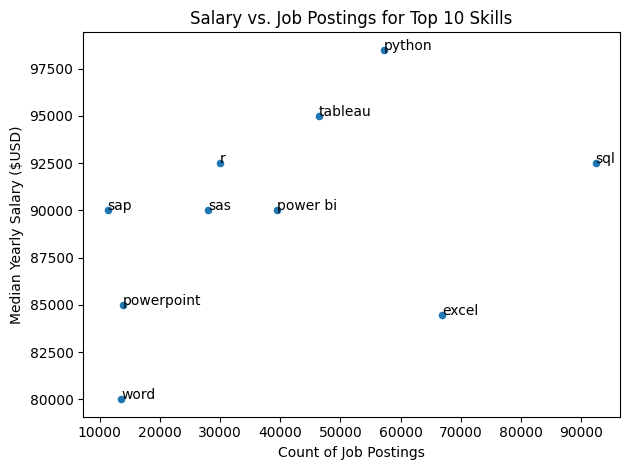

In [37]:
skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Job Postings for Top 10 Skills')
plt.tight_layout()

for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt)

plt.show()

## Matplotlib: Advanced Customization
### import adjust_text

In [10]:
from adjustText import adjust_text

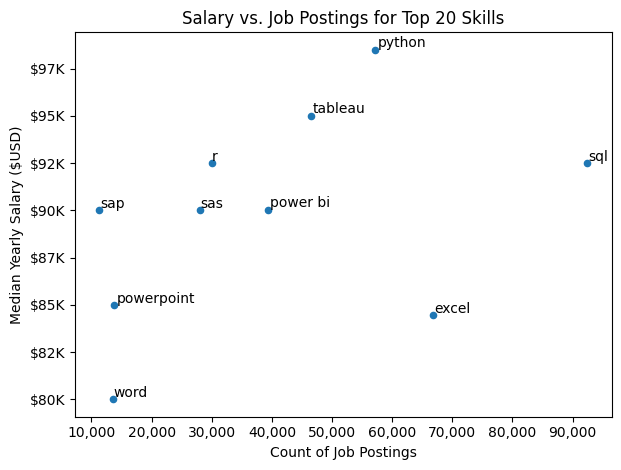

In [54]:
import matplotlib.ticker as mticker

# fig, ax = plt.subplots()


skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Job Postings for Top 20 Skills')
plt.tight_layout()

texts: list = []

for i, txt in enumerate(skills_stats.index):
    texts.append(plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt))

ax = plt.gca()
# ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: x))
# ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: y))
# ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: pos))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

adjust_text(texts=texts,
            arrowprops=dict(arrowstyle='->', color='gray', lw=1))

plt.show()

## Matplotlib: Histograms
### df.plt(kind='hist')

In [61]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [62]:
df_DA_US.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,NaN,NaN,NaN,Assuredpartners,NaN,NaN
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,NaN,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,NaN,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."


In [63]:
df_DA_US.shape

(67816, 17)

Text(0, 0.5, 'Number of Jobs')

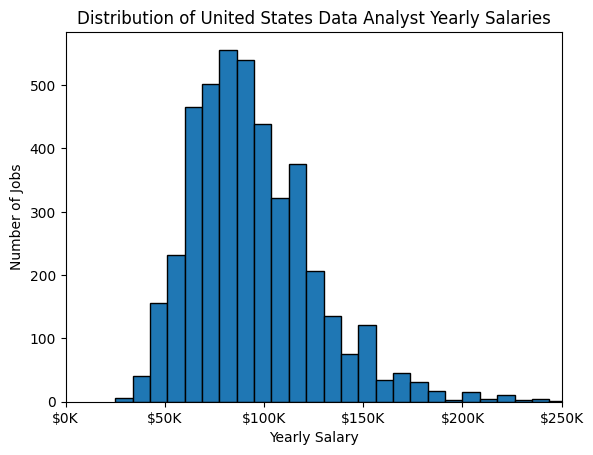

In [73]:
df_DA_US['salary_year_avg'].plot(kind='hist',
                                 bins=40,
                                 edgecolor='black')
plt.xlim(0, 250_000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

## Matplotlib: Box Plots
### df.plot(kind='box')

In [75]:
# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [78]:
df_DA_US['salary_year_avg'].sample(10)

770385     56212.500000
266556    115000.000000
444392     55000.000000
354007     89315.203125
194011     47500.000000
528761     65000.000000
765816     58568.000000
498201     78000.000000
548455     95000.000000
729522     67500.000000
Name: salary_year_avg, dtype: float64

<Axes: >

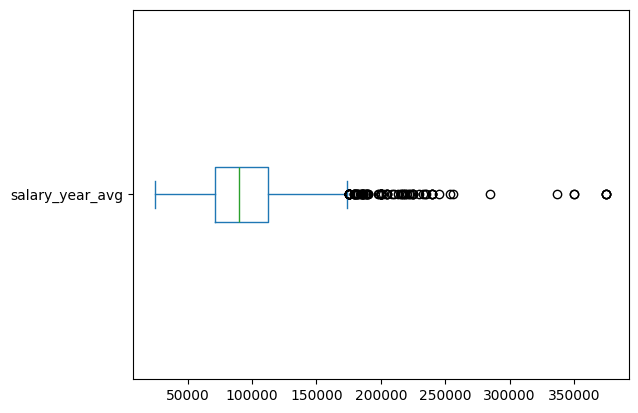

In [80]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

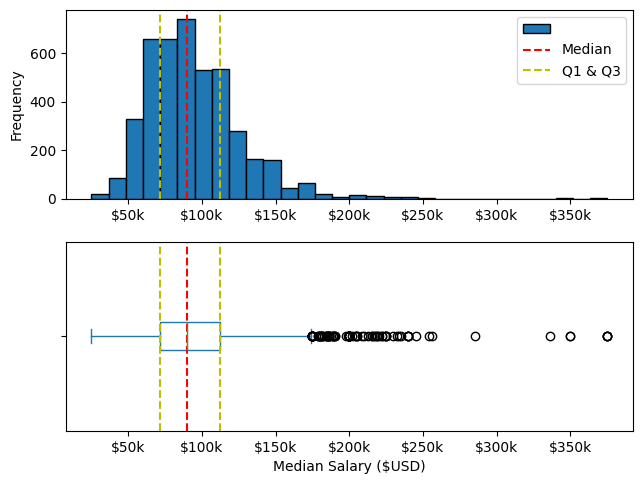

In [90]:
fig, ax = plt.subplots(2, 1)
fig.tight_layout(h_pad=1)

df_DA_US['salary_year_avg'].plot(kind='hist', ax=ax[0], bins=30, edgecolor='black')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[0].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
ax[0].legend(['', 'Median', 'Q1 & Q3'])

df_DA_US['salary_year_avg'].plot(kind='box', ax=ax[1], vert=False)
ax[1].set_yticklabels('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[1].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')

plt.show()

In [108]:
job_titles: list = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# Filter the data to appropriate job_titles
# Only get data analyst jobs
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset='salary_year_avg')
job_list: list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

In [109]:
df_US['job_title_short'].value_counts()

job_title_short
Data Scientist    4553
Data Analyst      4350
Data Engineer     2915
Name: count, dtype: int64

In [110]:
job_list[0]

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64

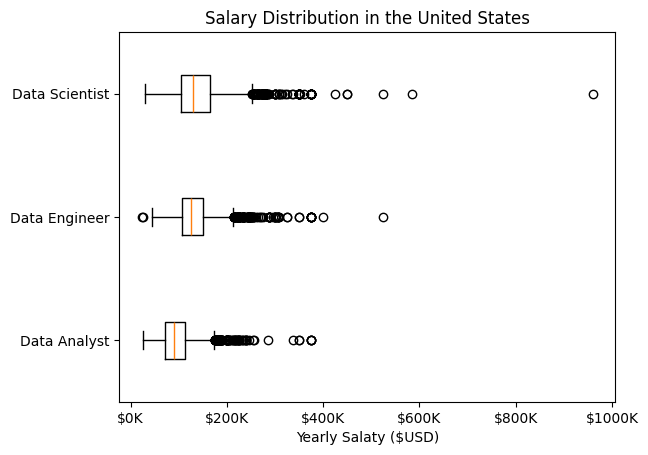

In [113]:
plt.boxplot(job_list, tick_labels=job_titles, vert=False)

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salaty ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.show()